#Quest:
- 재수술 dataset(입원일자)
- 주차별 환자 입원/퇴원 추이(평균/합계) 시각화
- 요일별 환자 입원/퇴원 추이(평균/합계) 시각화

In [171]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [172]:
df_ROS = pd.read_csv('../../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [173]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [174]:
#데이터타입을 datetime으로 바꾸기 

df_ROS['입원일자'] = df_ROS['입원일자'].astype(str)
df_ROS['입원일자_datetime'] = pd.to_datetime(df_ROS['입원일자'])

df_ROS['퇴원일자'] = df_ROS['퇴원일자'].astype(str)
df_ROS['퇴원일자_datetime'] = pd.to_datetime(df_ROS['퇴원일자'])

In [175]:
df_ROS[['입원일자_datetime', '퇴원일자_datetime']]

,입원일자_datetime,퇴원일자_datetime
0,2019-07-13,2019-07-16
1,2019-07-15,2019-07-16
2,2019-07-29,2019-08-01
3,2019-07-31,2019-08-03
4,2019-09-03,2019-09-07
...,...,...
1889,2017-04-07,2017-04-08
1890,2017-04-26,2017-04-29
1891,2017-04-10,2017-04-12
1892,2017-04-08,2017-04-11


In [176]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.weekofyear
df_ROS['입원일자_datetime_week']

C:\Users\5-21\AppData\Local\Temp\ipykernel_14300\2906322704.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.weekofyear


0       28
1       29
2       31
3       31
4       36
        ..
1889    14
1890    17
1891    15
1892    14
1893    15
Name: 입원일자_datetime_week, Length: 1894, dtype: int64

In [177]:
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.weekofyear
df_ROS['퇴원일자_datetime_week']

C:\Users\5-21\AppData\Local\Temp\ipykernel_14300\747409639.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.weekofyear


0       29
1       29
2       31
3       31
4       36
        ..
1889    14
1890    17
1891    15
1892    15
1893    15
Name: 퇴원일자_datetime_week, Length: 1894, dtype: int64

In [178]:
df_ROS['입원일자_datetime_day'] = df_ROS['입원일자_datetime'].dt.day_name()
df_ROS_day_in = df_ROS['입원일자_datetime_day']
df_ROS_day_in

0        Saturday
1          Monday
2          Monday
3       Wednesday
4         Tuesday
          ...    
1889       Friday
1890    Wednesday
1891       Monday
1892     Saturday
1893    Wednesday
Name: 입원일자_datetime_day, Length: 1894, dtype: object

In [179]:
df_ROS['퇴원일자_datetime_day'] = df_ROS['퇴원일자_datetime'].dt.day_name()
df_ROS_day_out =df_ROS['퇴원일자_datetime_day']
df_ROS_day_out

0         Tuesday
1         Tuesday
2        Thursday
3        Saturday
4        Saturday
          ...    
1889     Saturday
1890     Saturday
1891    Wednesday
1892      Tuesday
1893     Thursday
Name: 퇴원일자_datetime_day, Length: 1894, dtype: object

Text(0, 0.5, '입원/퇴원count 평균')

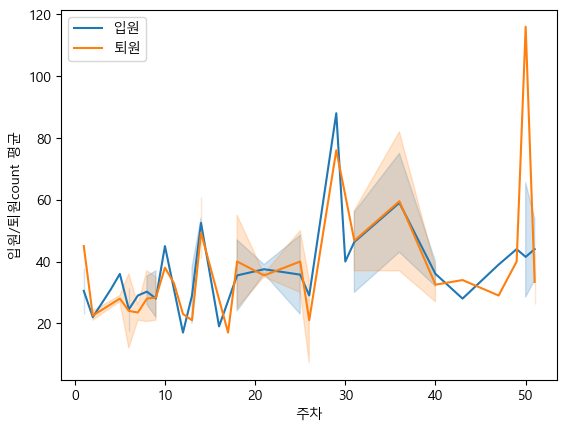

In [180]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_week', y= df_ROS['입원일자_datetime_week'].value_counts(), label='입원')
sns.lineplot(data=df_ROS, x='퇴원일자_datetime_week', y= df_ROS['퇴원일자_datetime_week'].value_counts(), label='퇴원')
plt.xlabel("주차")
plt.ylabel("입원/퇴원count 평균")

Text(0, 0.5, '입원/퇴원count 합계')

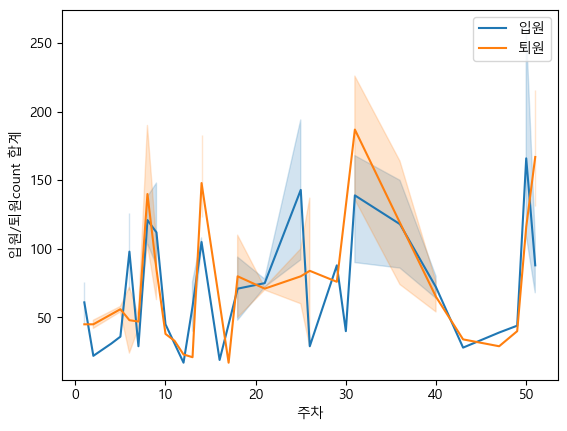

In [181]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_week', y= df_ROS['입원일자_datetime_week'].value_counts(), estimator=sum, label='입원')
sns.lineplot(data=df_ROS, x='퇴원일자_datetime_week', y= df_ROS['퇴원일자_datetime_week'].value_counts(), estimator=sum, label='퇴원')
plt.xlabel("주차")
plt.ylabel("입원/퇴원count 합계")

<Axes: xlabel='입원일자_datetime_day', ylabel='count'>

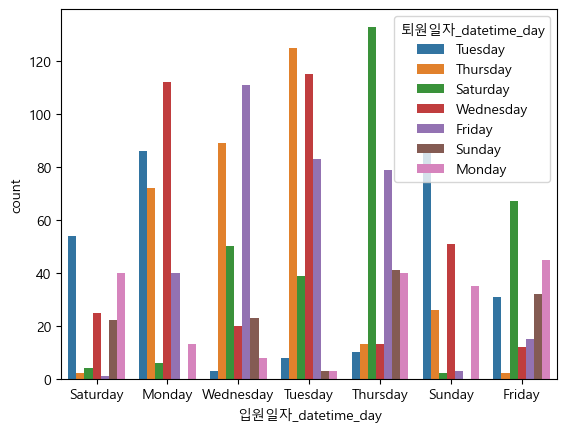

In [182]:
sns.countplot(data=df_ROS, x='입원일자_datetime_day', hue='퇴원일자_datetime_day')
# sns.countplot(data=df_ROS, x='퇴원일자_datetime_day')

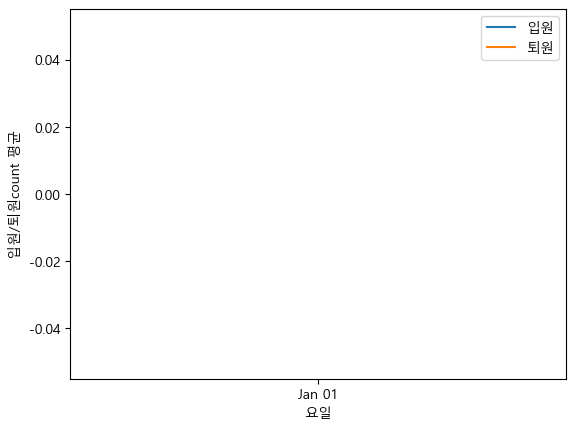

In [183]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_day', y= df_ROS['입원일자_datetime_day'].value_counts(), label='입원')
sns.lineplot(data=df_ROS, x='퇴원일자_datetime_day', y= df_ROS['퇴원일자_datetime_day'].value_counts(), label='퇴원')
plt.xlabel("요일")
plt.ylabel("입원/퇴원count 평균")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))
plt.rcParams['axes.unicode_minus'] = False
plt.show()


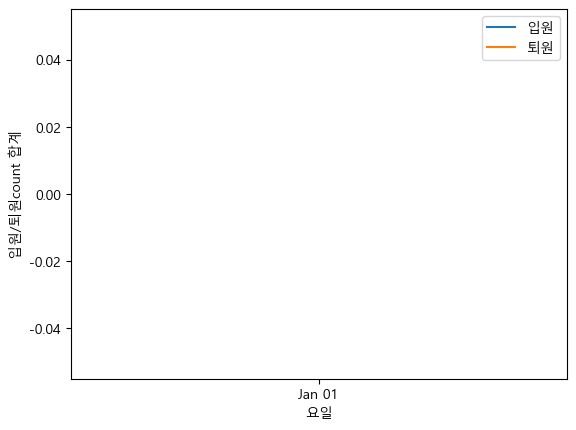

In [184]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_day', y= df_ROS['입원일자_datetime_day'].value_counts(), estimator=sum, label='입원')
sns.lineplot(data=df_ROS, x='퇴원일자_datetime_day', y= df_ROS['퇴원일자_datetime_day'].value_counts(), estimator=sum, label='퇴원')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("요일")
plt.ylabel("입원/퇴원count 합계")
plt.show()

In [185]:
# sns.lineplot(data=df_ROS_day_in, x=df_ROS_day_in.index, y=df_ROS['입원일자_datetime_day'].value_counts(), estimator=sum, label='입원')
# sns.lineplot(data=df_ROS_day_out, x=df_ROS_day_out.index, y=df_ROS['퇴원일자_datetime_day'].value_counts(), estimator=sum, label='퇴원')